In [399]:
import pandas as pd
import matplotlib.pyplot as plt



In [400]:
# Path to the dataset 
cta_ridership_path = "resource/CTA_-_Ridership_-__L__Station_Entries_-_Monthly_Day-Type_Averages___Totals (1).csv"

# Load the dataset into a DataFrame
cta_ridership_df = pd.read_csv(cta_ridership_path)

print(cta_ridership_df.head())




   station_id stationame month_beginning  avg_weekday_rides  \
0       40900     Howard      01/01/2001             6233.9   
1       41190     Jarvis      01/01/2001             1489.1   
2       40100      Morse      01/01/2001             4412.5   
3       41300     Loyola      01/01/2001             4664.5   
4       40760  Granville      01/01/2001             3109.8   

   avg_saturday_rides  avg_sunday-holiday_rides  monthtotal  
0              3814.5                    2408.6      164447  
1              1054.0                     718.0       40567  
2              3064.5                    2087.8      119772  
3              3156.0                    1952.8      125008  
4              2126.0                    1453.8       84189  


##CLEANING -Analysis-Visualization DATA

In [401]:
# Check for missing values


print(cta_ridership_df.isnull().sum())

station_id                  0
stationame                  0
month_beginning             0
avg_weekday_rides           0
avg_saturday_rides          0
avg_sunday-holiday_rides    0
monthtotal                  0
dtype: int64


In [402]:
cta_ridership_df["month_beginning"] = pd.to_datetime(cta_ridership_df["month_beginning"])
cta_ridership_df.head()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
0,40900,Howard,2001-01-01,6233.9,3814.5,2408.6,164447
1,41190,Jarvis,2001-01-01,1489.1,1054.0,718.0,40567
2,40100,Morse,2001-01-01,4412.5,3064.5,2087.8,119772
3,41300,Loyola,2001-01-01,4664.5,3156.0,1952.8,125008
4,40760,Granville,2001-01-01,3109.8,2126.0,1453.8,84189


In [403]:
# Rename 'stationame' to 'station_name'
cta_ridership_df.rename(columns={'stationame': 'station_name'}, inplace=True)


In [404]:
#  Separate 'month_beginning' into 'year' and 'month' columns
cta_ridership_df['year'] = cta_ridership_df['month_beginning'].dt.year
cta_ridership_df['month'] = cta_ridership_df['month_beginning'].dt.month


In [405]:
#let's check the first few rows of the cleaned data
cta_ridership_df.head()

,station_id,station_name,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal,year,month
0,40900,Howard,2001-01-01,6233.9,3814.5,2408.6,164447,2001,1
1,41190,Jarvis,2001-01-01,1489.1,1054.0,718.0,40567,2001,1
2,40100,Morse,2001-01-01,4412.5,3064.5,2087.8,119772,2001,1
3,41300,Loyola,2001-01-01,4664.5,3156.0,1952.8,125008,2001,1
4,40760,Granville,2001-01-01,3109.8,2126.0,1453.8,84189,2001,1


In [406]:
# Group by year and month, then sum the monthtotal to get the total ridership per month
monthly_ridership = cta_ridership_df.groupby(['year', 'month'])['monthtotal'].sum().reset_index()
monthly_ridership

,year,month,monthtotal
0,2001,1,12286897
1,2001,2,11415793
2,2001,3,12914296
3,2001,4,12287737
4,2001,5,13148263
...,...,...,...
275,2023,12,7494166
276,2024,1,7264630
277,2024,2,7911337
278,2024,3,8576406


In [407]:
# Pivot the data 
ridership_pivot = monthly_ridership.pivot_table(values='monthtotal', index='month', columns='year', fill_value=0)
ridership_pivot

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
month,,,,,,,,,,,,,,,,,,,,,
1,12286897.0,12309991.0,11860130.0,11309196.0,11581403.0,12407347.0,12617830.0,12329732.0,12670605.0,12713539.0,...,14698498.0,14836599.0,14626737.0,14187198.0,13134311.0,14054329.0,2965081.0,4815276.0,6884790.0,7264630.0
2,11415793.0,11506712.0,11203581.0,11347503.0,11401625.0,11889136.0,11366892.0,12410563.0,12495760.0,12794456.0,...,14097691.0,15212277.0,14142406.0,13571687.0,13407429.0,13365729.0,3015927.0,5541207.0,6603029.0,7911337.0
3,12914296.0,12183410.0,12341355.0,12773186.0,12659665.0,13710273.0,13445416.0,12916861.0,13906626.0,14553926.0,...,16449070.0,16677633.0,16073109.0,15513631.0,14746263.0,8024293.0,3898318.0,7110938.0,7904152.0,8576406.0
4,12287737.0,12815884.0,12391027.0,12333972.0,12755659.0,12951806.0,12574531.0,13837585.0,13884272.0,14590334.0,...,16404520.0,16141007.0,15169117.0,15089574.0,14995232.0,1849629.0,4112171.0,6967276.0,7797900.0,8873397.0
5,13148263.0,12973404.0,12602473.0,12067329.0,12964006.0,14089195.0,13647689.0,13944972.0,13766591.0,14380178.0,...,16492679.0,16597555.0,16298485.0,16070627.0,15735446.0,1830042.0,4768231.0,7522839.0,8635413.0,0.0
6,13016951.0,12714364.0,12715662.0,12968602.0,13498294.0,14001407.0,13698349.0,14077655.0,14391134.0,15119802.0,...,17255694.0,17085925.0,16737259.0,15888088.0,15336417.0,2414845.0,5669251.0,7905758.0,8832338.0,0.0
7,13382993.0,13392822.0,13376266.0,12849068.0,13139642.0,14148715.0,14046147.0,14898685.0,15133049.0,15169200.0,...,17977486.0,16813640.0,15917931.0,15932164.0,15669325.0,3491319.0,6795339.0,7887694.0,8511582.0,0.0
8,13374592.0,13036551.0,12687510.0,12529356.0,13538824.0,14444081.0,14035867.0,14702332.0,14337678.0,15321024.0,...,17049933.0,16886476.0,16967756.0,16677852.0,15917367.0,3494408.0,6858883.0,8143124.0,9444418.0,0.0
9,12314751.0,13078121.0,13328526.0,13107556.0,14194677.0,14264352.0,13603498.0,14780937.0,15039598.0,15671310.0,...,17772902.0,17097002.0,16572350.0,16223077.0,15764357.0,3745541.0,7680638.0,8643576.0,9411771.0,0.0


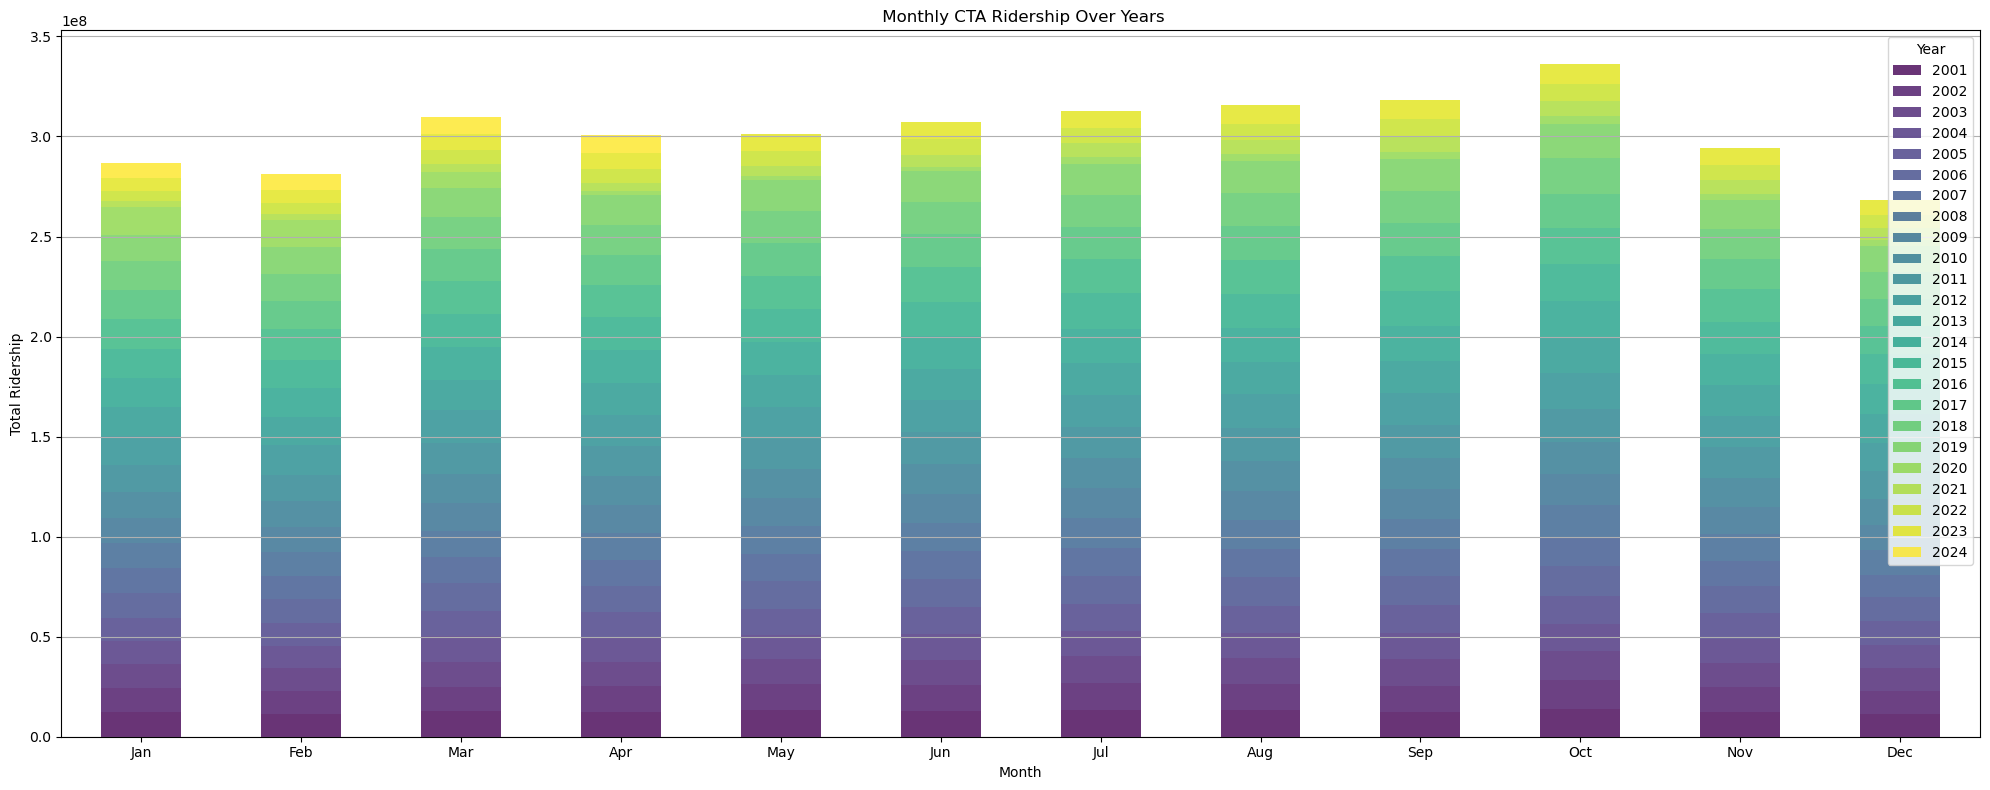

In [408]:
#Bar Chart of Monthly CTA Ridership Over Years
ridership_pivot.plot(kind='bar', stacked=True, figsize=(20, 8), colormap='viridis', alpha=0.8)
plt.title(' Monthly CTA Ridership Over Years')
plt.xlabel('Month')
plt.ylabel('Total Ridership')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title='Year')
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('Monthly CTA Ridership Over Years')
plt.show()

In [409]:
# Sort the data by 'monthtotal' to find the busiest months
busiest_months = monthly_ridership.sort_values(by='monthtotal', ascending=False)

#print top 5 busiest month
print(busiest_months.head())

     year  month  monthtotal
177  2015     10    18632339
165  2014     10    18411645
174  2015      7    17977486
189  2016     10    17885645
141  2012     10    17825589


In [410]:
# Calculate the average for the top 5 busiest months
top_5_busiest_months = busiest_months.head(5)
avg_top_5 = top_5_busiest_months['monthtotal'].mean()
print(avg_top_5)

18146540.8


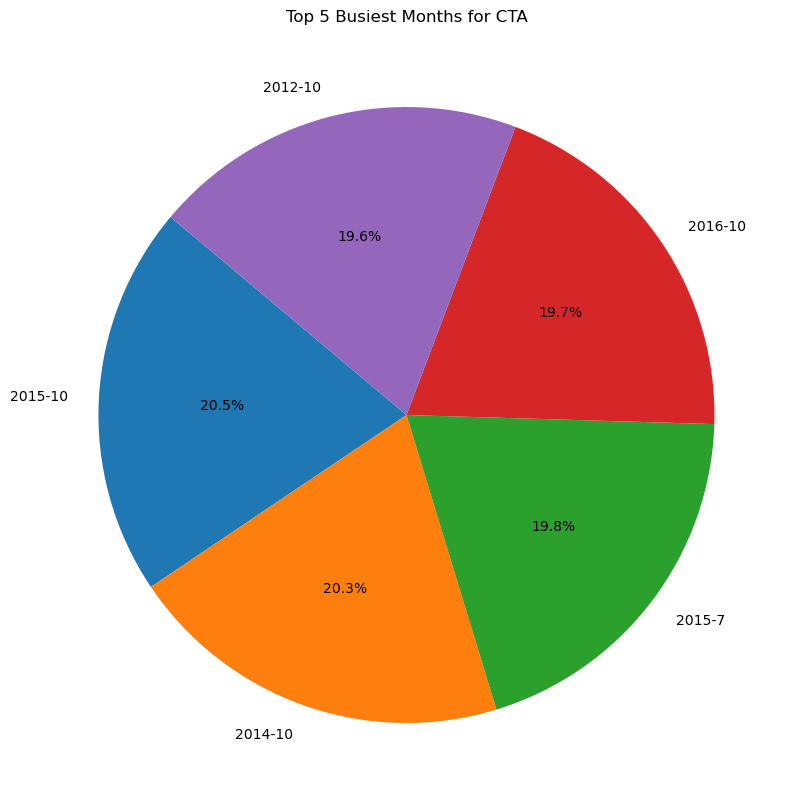

In [411]:
# Pie chart for the top 5 busiest months
top_5_busiest_months = busiest_months.head(5)

plt.figure(figsize=(10, 10))
plt.pie(top_5_busiest_months['monthtotal'], 
        labels=top_5_busiest_months['year'].astype(str) + '-' + top_5_busiest_months['month'].astype(str), 
        autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Top 5 Busiest Months for CTA')
plt.savefig('Top 5 Busiest Months for CTA')
plt.show()

In [412]:
#print top 10 busiest month
print(busiest_months.head(10))

     year  month  monthtotal
177  2015     10    18632339
165  2014     10    18411645
174  2015      7    17977486
189  2016     10    17885645
141  2012     10    17825589
176  2015      9    17772902
213  2018     10    17733114
153  2013     10    17598968
201  2017     10    17336213
164  2014      9    17306655


In [413]:
# Calculate the average for the top 10 busiest months
top_10_busiest_months = busiest_months.head(10)
avg_top_10 = top_10_busiest_months['monthtotal'].mean()
print(avg_top_10)

17848055.6


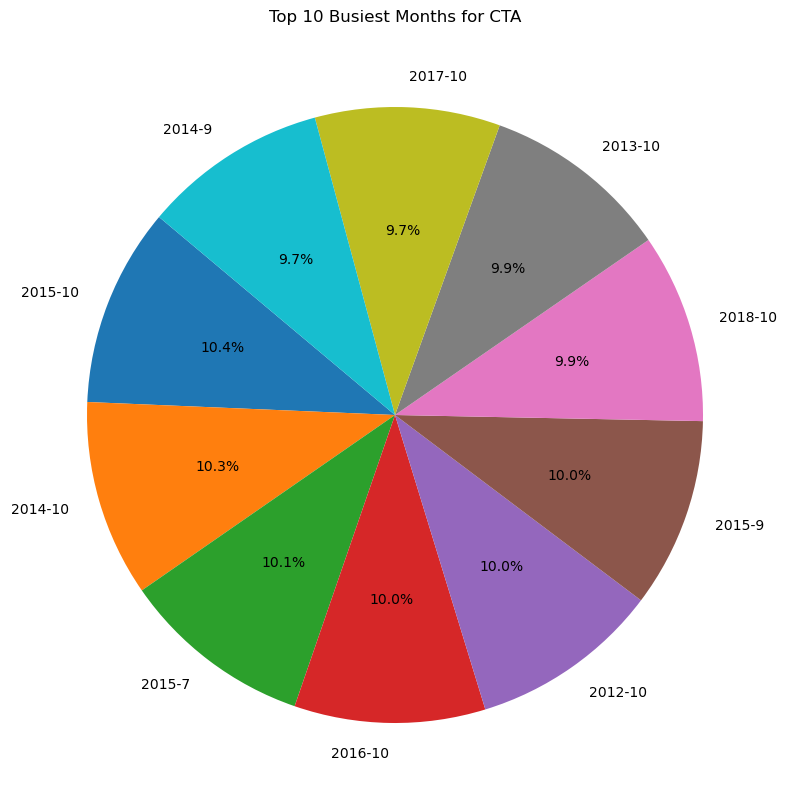

In [414]:
# Pie chart for the top 10 busiest months
top_10_busiest_months = busiest_months.head(10)



plt.figure(figsize=(10, 10))
plt.pie(top_10_busiest_months['monthtotal'], 
        labels=top_10_busiest_months['year'].astype(str) + '-' + top_10_busiest_months['month'].astype(str), 
        autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Top 10 Busiest Months for CTA')
plt.savefig('Top 10 Busiest Months for CTA')
plt.show()

In [415]:
#correlation for the busiest months

correlation_busiest_months = busiest_months.head(10)
correlation_matrix = correlation_busiest_months[['year', 'month',  'monthtotal']].corr()
print(correlation_matrix)

                year     month  monthtotal
year        1.000000  0.031902   -0.116272
month       0.031902  1.000000    0.062142
monthtotal -0.116272  0.062142    1.000000
